In [25]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

In [26]:
from sklearn.datasets import load_digits
digits = load_digits()

In [27]:
# 아래와 같은 0부터 9까지의 숫자를 손으로 쓴 이미지 데이터 가 있다 

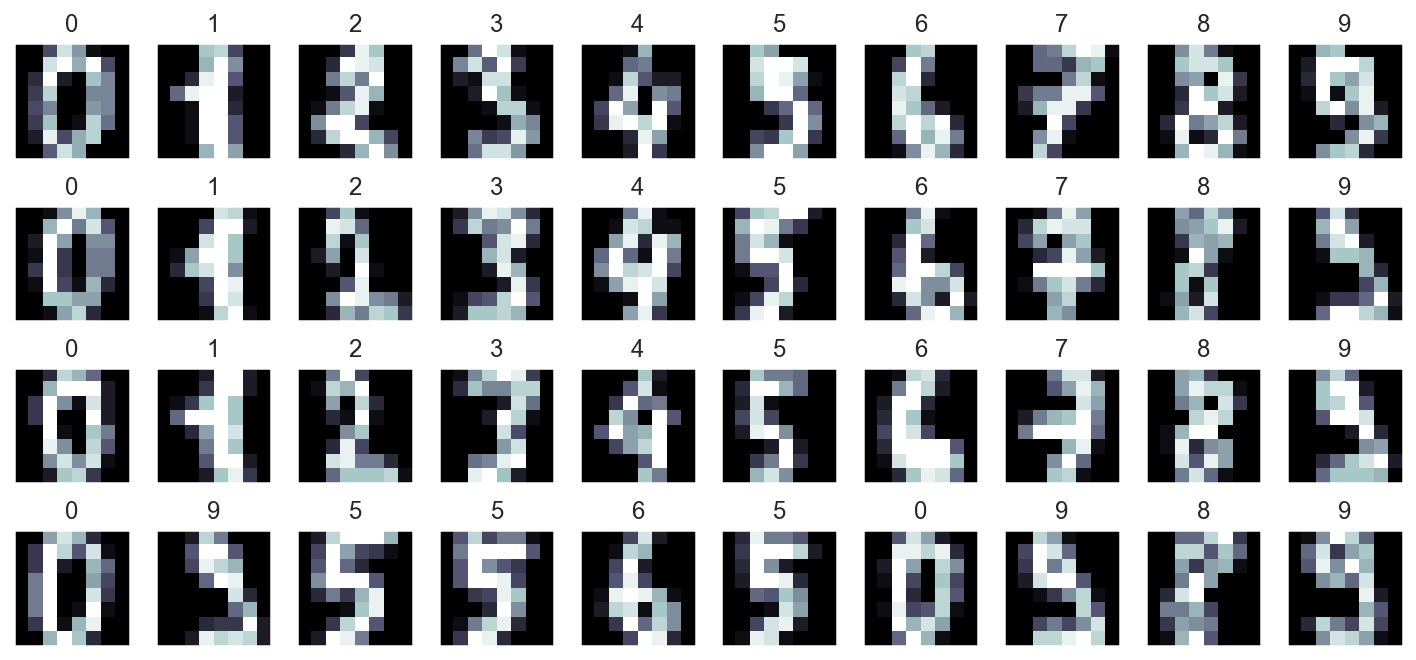

In [28]:
np.random.seed(0)
N = 4
M = 10
fig = plt.figure(figsize=(10, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
for i in range(N):
    for j in range(M):
        k = i*M+j
        ax = fig.add_subplot(N, M, k+1)
        ax.imshow(digits.images[k], cmap=plt.cm.bone, interpolation="none")
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title(digits.target_names[digits.target[k]])
plt.tight_layout()
plt.show()

In [ ]:
# df를 다음과 같이 저장하고 
# 종속 변수는 target 
# 독립 변수는 target을 제외한 나머지 값들이다.

In [29]:
df = pd.DataFrame(digits.data, columns=digits.feature_names)
sy = pd.Series(digits.target, dtype="category")
sy = sy.cat.rename_categories(digits.target_names)
df['target'] = sy
df.tail()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9
1796,0.0,0.0,10.0,14.0,8.0,1.0,0.0,0.0,0.0,2.0,...,0.0,0.0,1.0,8.0,12.0,14.0,12.0,1.0,0.0,8


In [10]:
# 문제 1번 
# 해당 데이터를 train data 와 test data 로 나누어라 (8:2)

In [36]:
# code
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

SS = StandardScaler()
SS.fit(digits.data)

df_ss = SS.transform(digits.data) 

X_train, X_test, y_train, y_test = train_test_split(df_ss, digits.target, 
                                                    test_size=0.2,
                                                    random_state = 13)

In [31]:
# 문제 2번
# GBM 알고리즘을 사용하여 ACC score를 구하여라
# 파라미터는 자유


In [37]:
# code

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import time
import warnings

warnings.filterwarnings('ignore')
start_time = time.time()
gb_clf = GradientBoostingClassifier(random_state=13)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)

print('ACC : ', accuracy_score(y_test, gb_pred))
print('Fit time : ', time.time() - start_time)

ACC :  0.9666666666666667
Fit time :  4.499384880065918


In [20]:
# 문제 3번
# xgb 부스트를 사용하여서 acc score을 구하여라 
# v파라미터는 자유 

In [40]:
# code
from xgboost import XGBClassifier

evals = [(X_test, y_test)]

start_time = time.time()
xgb = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgb.fit(X_train, y_train, early_stopping_rounds=10, eval_set=evals)
xgb_pred = xgb.predict(X_test)
print('ACC : ', accuracy_score(y_test, xgb_pred))
print('Fit time : ', time.time() - start_time)

[0]	validation_0-merror:0.18611
Will train until validation_0-merror hasn't improved in 10 rounds.
[1]	validation_0-merror:0.14167
[2]	validation_0-merror:0.13889
[3]	validation_0-merror:0.13056
[4]	validation_0-merror:0.10556
[5]	validation_0-merror:0.10556
[6]	validation_0-merror:0.09722
[7]	validation_0-merror:0.09444
[8]	validation_0-merror:0.09722
[9]	validation_0-merror:0.08611
[10]	validation_0-merror:0.07778
[11]	validation_0-merror:0.08056
[12]	validation_0-merror:0.07500
[13]	validation_0-merror:0.08333
[14]	validation_0-merror:0.08333
[15]	validation_0-merror:0.08333
[16]	validation_0-merror:0.08333
[17]	validation_0-merror:0.08333
[18]	validation_0-merror:0.08056
[19]	validation_0-merror:0.08056
[20]	validation_0-merror:0.07778
[21]	validation_0-merror:0.07500
[22]	validation_0-merror:0.06944
[23]	validation_0-merror:0.06389
[24]	validation_0-merror:0.06111
[25]	validation_0-merror:0.05833
[26]	validation_0-merror:0.05833
[27]	validation_0-merror:0.05556
[28]	validation_0-m

In [4]:
# 문제 4번
# light bgm 을 사용하여서 acc score 을 구하여라
# 파라미터는 자유

In [207]:
# code


[1]	valid_0's multi_logloss: 1.95058
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 1.71631
[3]	valid_0's multi_logloss: 1.53053
[4]	valid_0's multi_logloss: 1.38203
[5]	valid_0's multi_logloss: 1.25713
[6]	valid_0's multi_logloss: 1.15038
[7]	valid_0's multi_logloss: 1.05792
[8]	valid_0's multi_logloss: 0.976383
[9]	valid_0's multi_logloss: 0.902491
[10]	valid_0's multi_logloss: 0.838112
[11]	valid_0's multi_logloss: 0.781125
[12]	valid_0's multi_logloss: 0.728709
[13]	valid_0's multi_logloss: 0.680231
[14]	valid_0's multi_logloss: 0.636707
[15]	valid_0's multi_logloss: 0.598459
[16]	valid_0's multi_logloss: 0.560263
[17]	valid_0's multi_logloss: 0.527172
[18]	valid_0's multi_logloss: 0.495913
[19]	valid_0's multi_logloss: 0.467325
[20]	valid_0's multi_logloss: 0.440666
[21]	valid_0's multi_logloss: 0.415614
[22]	valid_0's multi_logloss: 0.39387
[23]	valid_0's multi_logloss: 0.373188
[24]	valid_0's multi_logloss: 0.353842
[25]	valid_0's multi

0.9555555555555556

In [42]:
from lightgbm import LGBMClassifier

start_time = time.time()
xgb = LGBMClassifier(n_estimators=400)
xgb.fit(X_train, y_train, early_stopping_rounds=100, eval_set=evals)
xgb_pred = xgb.predict(X_test)
print('ACC : ', accuracy_score(y_test, xgb_pred))
print('Fit time : ', time.time() - start_time)

[1]	valid_0's multi_logloss: 1.6764
Training until validation scores don't improve for 100 rounds
[2]	valid_0's multi_logloss: 1.37372
[3]	valid_0's multi_logloss: 1.15425
[4]	valid_0's multi_logloss: 0.991369
[5]	valid_0's multi_logloss: 0.859224
[6]	valid_0's multi_logloss: 0.752908
[7]	valid_0's multi_logloss: 0.667572
[8]	valid_0's multi_logloss: 0.589748
[9]	valid_0's multi_logloss: 0.52731
[10]	valid_0's multi_logloss: 0.475521
[11]	valid_0's multi_logloss: 0.432501
[12]	valid_0's multi_logloss: 0.39267
[13]	valid_0's multi_logloss: 0.355125
[14]	valid_0's multi_logloss: 0.32385
[15]	valid_0's multi_logloss: 0.29775
[16]	valid_0's multi_logloss: 0.275118
[17]	valid_0's multi_logloss: 0.255075
[18]	valid_0's multi_logloss: 0.237015
[19]	valid_0's multi_logloss: 0.22044
[20]	valid_0's multi_logloss: 0.205379
[21]	valid_0's multi_logloss: 0.19308
[22]	valid_0's multi_logloss: 0.180366
[23]	valid_0's multi_logloss: 0.171248
[24]	valid_0's multi_logloss: 0.163735
[25]	valid_0's multi_

ACC :  0.9722222222222222
Fit time :  0.8873040676116943
